# Step 1: Load and Inspect the Dataset

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df = pd.read_csv("penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Step 2: Understand Data Types and Missing Values

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [207]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [208]:
((df.isnull().sum() * 100.0)/len(df)).round(2)

studyName               0.00
Sample Number           0.00
Species                 0.00
Region                  0.00
Island                  0.00
Stage                   0.00
Individual ID           0.00
Clutch Completion       0.00
Date Egg                0.00
Culmen Length (mm)      0.58
Culmen Depth (mm)       0.58
Flipper Length (mm)     0.58
Body Mass (g)           0.58
Sex                     2.91
Delta 15 N (o/oo)       4.07
Delta 13 C (o/oo)       3.78
Comments               92.44
dtype: float64

# Step 3: Summary Statistics & Descriptive Analysis

In [210]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [211]:
species_wise_summary = df.groupby('Species')[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].mean().round(2)
species_wise_summary

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Species,,,,
Adelie Penguin (Pygoscelis adeliae),38.79,18.35,189.95,3700.66
Chinstrap penguin (Pygoscelis antarctica),48.83,18.42,195.82,3733.09
Gentoo penguin (Pygoscelis papua),47.50,14.98,217.19,5076.02


In [212]:
sex_wise_summary = df.groupby('Sex')[['Body Mass (g)', 'Flipper Length (mm)']].mean().round(1)
sex_wise_summary

,Body Mass (g),Flipper Length (mm)
Sex,,
.,4875.0,217.0
FEMALE,3862.3,197.4
MALE,4545.7,204.5


In [213]:
island_wise_summary = df.groupby('Island')[['Culmen Length (mm)', 'Body Mass (g)']].mean().round(1)
island_wise_summary

,Culmen Length (mm),Body Mass (g)
Island,,
Biscoe,45.3,4716.0
Dream,44.2,3712.9
Torgersen,39.0,3706.4


In [214]:
species_summ = df.groupby('Species').agg({'Flipper Length (mm)': ['median', 'std'], 'Body Mass (g)': ['median', 'std']}).round(1)
species_summ

Flipper Length (mm)       \
                                                       median  std   
Species                                                              
Adelie Penguin (Pygoscelis adeliae)                     190.0  6.5   
Chinstrap penguin (Pygoscelis antarctica)               196.0  7.1   
Gentoo penguin (Pygoscelis papua)                       216.0  6.5   

                                          Body Mass (g)         
                                                 median    std  
Species                                                         
Adelie Penguin (Pygoscelis adeliae)              3700.0  458.6  
Chinstrap penguin (Pygoscelis antarctica)        3700.0  384.3  
Gentoo penguin (Pygoscelis papua)                5000.0  504.1

## Q1: How many penguins belong to each species?

In [216]:
df['Species'].value_counts().reset_index(name = 'count')

,Species,count
0,Adelie Penguin (Pygoscelis adeliae),152
1,Gentoo penguin (Pygoscelis papua),124
2,Chinstrap penguin (Pygoscelis antarctica),68


## Q2: List the average body mass (in grams) by species and sex.

In [218]:
df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean().round(1).reset_index(name = 'avg_body_mass')

,Species,Sex,avg_body_mass
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,3368.8
1,Adelie Penguin (Pygoscelis adeliae),MALE,4043.5
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,3527.2
3,Chinstrap penguin (Pygoscelis antarctica),MALE,3939.0
4,Gentoo penguin (Pygoscelis papua),.,4875.0
5,Gentoo penguin (Pygoscelis papua),FEMALE,4679.7
6,Gentoo penguin (Pygoscelis papua),MALE,5484.8


## Q3: What is the mean flipper length of Gentoo penguins from the Biscoe island?

In [220]:
gentoo_biscoe = df[(df['Species'] == 'Gentoo penguin (Pygoscelis papua)') & (df['Island'] == 'Biscoe')]

In [221]:
gentoo_biscoe['Flipper Length (mm)'].mean().round(1)

217.2

## Q4: Find the number of unique individual IDs per species.

In [223]:
df.groupby('Species')['Individual ID'].nunique().reset_index(name = 'count')

,Species,count
0,Adelie Penguin (Pygoscelis adeliae),132
1,Chinstrap penguin (Pygoscelis antarctica),58
2,Gentoo penguin (Pygoscelis papua),94


## Q5: Filter the rows where Clutch Completion is 'No' and Sex is missing. How many such entries exist?


In [225]:
df[(df['Clutch Completion'] == 'No') & (df['Sex'].isnull())]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q6: Plot a histogram of Body Mass (g) colored by species.

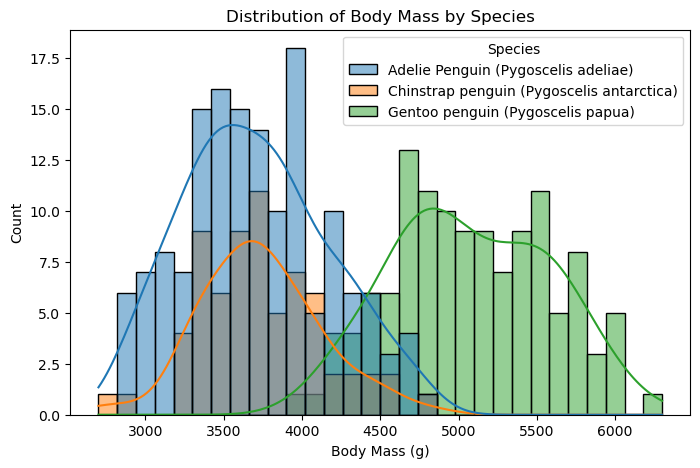

In [227]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'Body Mass (g)', hue = 'Species', kde=True, bins=30)
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.show()

## Q7: Use a boxplot to compare Flipper Length (mm) across species.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16164\3267478544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = 'Flipper Length (mm)', x = 'Species', palette = 'Set2')


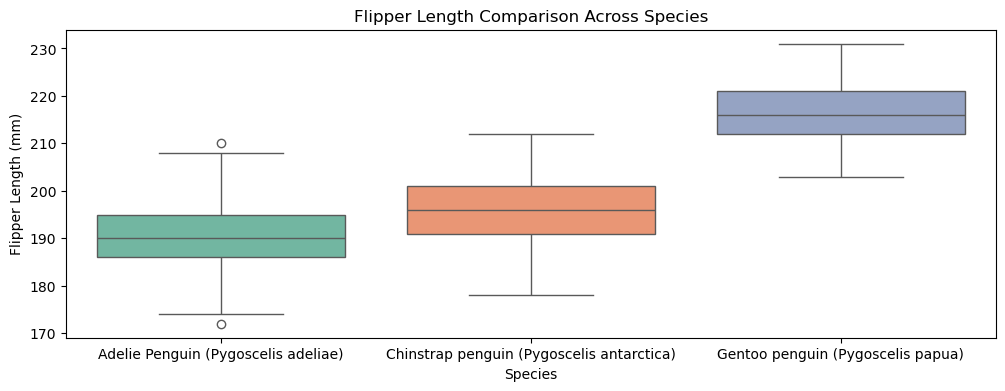

In [229]:
plt.figure(figsize = (12,4))
sns.boxplot(data = df, y = 'Flipper Length (mm)', x = 'Species', palette = 'Set2')
plt.title('Flipper Length Comparison Across Species')
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Species')
plt.show()

## Q8: Create a barplot showing average Culmen Length (mm) by island.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16164\3442794340.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Island', y = 'Culmen Length (mm)', estimator = 'mean', ci=None, palette='pastel')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16164\3442794340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Island', y = 'Culmen Length (mm)', estimator = 'mean', ci=None, palette='pastel')


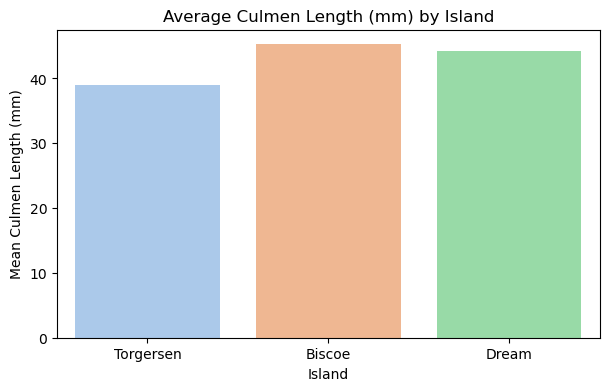

In [231]:
plt.figure(figsize = (7,4))
sns.barplot(data = df, x = 'Island', y = 'Culmen Length (mm)', estimator = 'mean', ci=None, palette='pastel')
plt.title('Average Culmen Length (mm) by Island')
plt.ylabel('Mean Culmen Length (mm)')
plt.xlabel('Island')
plt.show()

## Q9: Create a pairplot for numerical columns (Culmen Length, Depth, Flipper Length, Body Mass) colored by species.

In [233]:
df = df.dropna(subset = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])

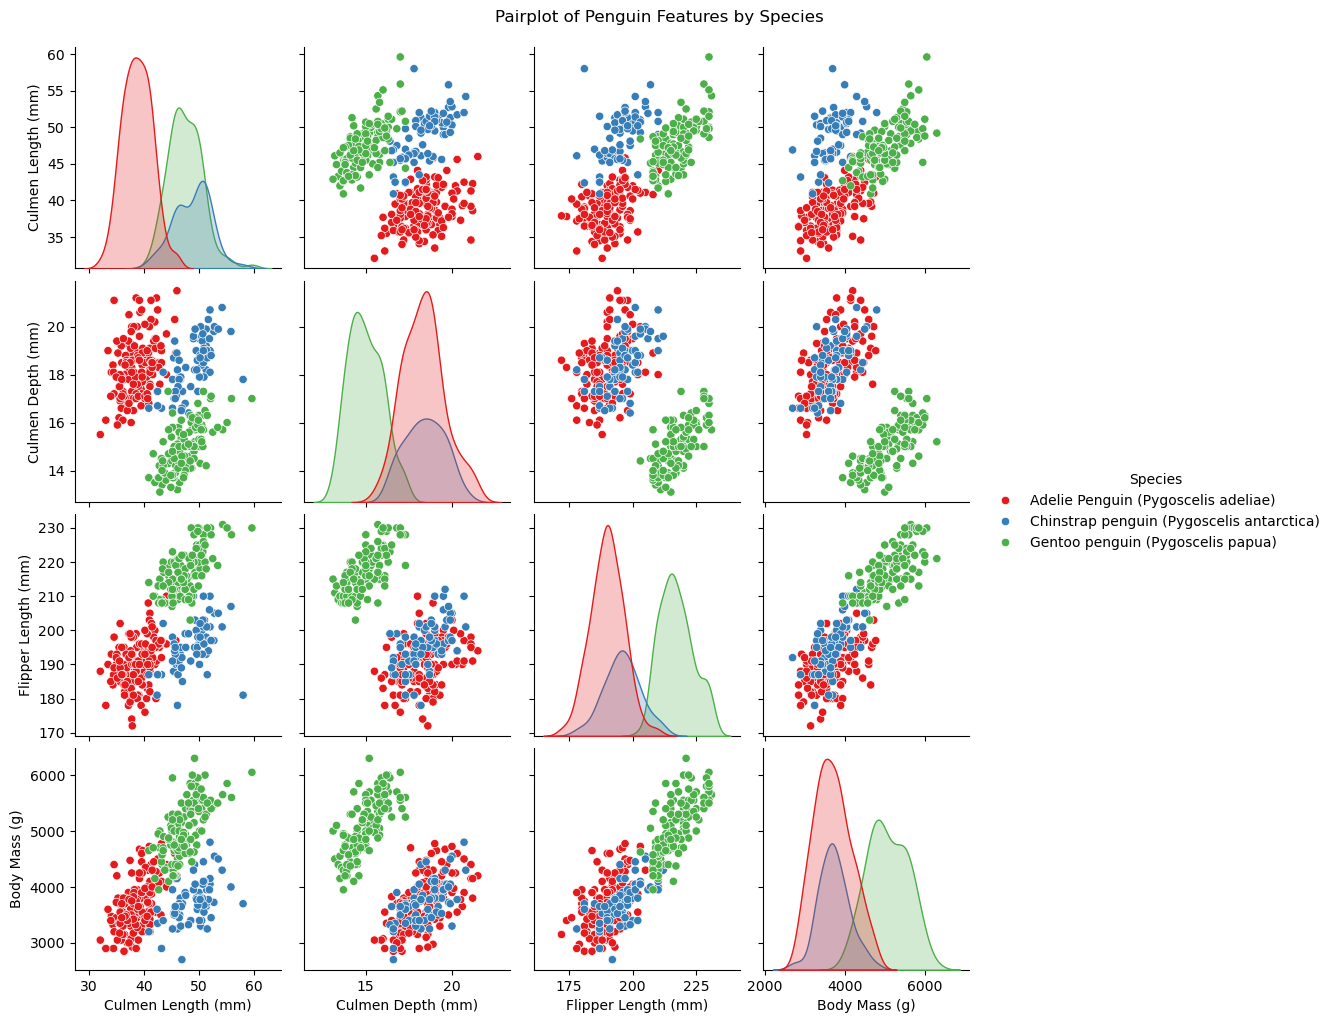

In [234]:
sns.pairplot(df, vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'], hue = 'Species', palette='Set1',
    diag_kind='kde')
plt.suptitle('Pairplot of Penguin Features by Species', y=1.02)
plt.show()

## Q10: Plot a heatmap showing correlation between numeric features.

In [236]:
numeric_cols = df.select_dtypes(include = 'number')
numeric_cols

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,39.1,18.7,181.0,3750.0,NaN,NaN
1,2,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,3,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,5,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,6,39.3,20.6,190.0,3650.0,8.66496,-25.29805
...,...,...,...,...,...,...,...
338,119,47.2,13.7,214.0,4925.0,7.99184,-26.20538
340,121,46.8,14.3,215.0,4850.0,8.41151,-26.13832
341,122,50.4,15.7,222.0,5750.0,8.30166,-26.04117
342,123,45.2,14.8,212.0,5200.0,8.24246,-26.11969


In [237]:
numeric_cols.isnull().sum()

Sample Number           0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

In [238]:
numeric_cols = numeric_cols.dropna()

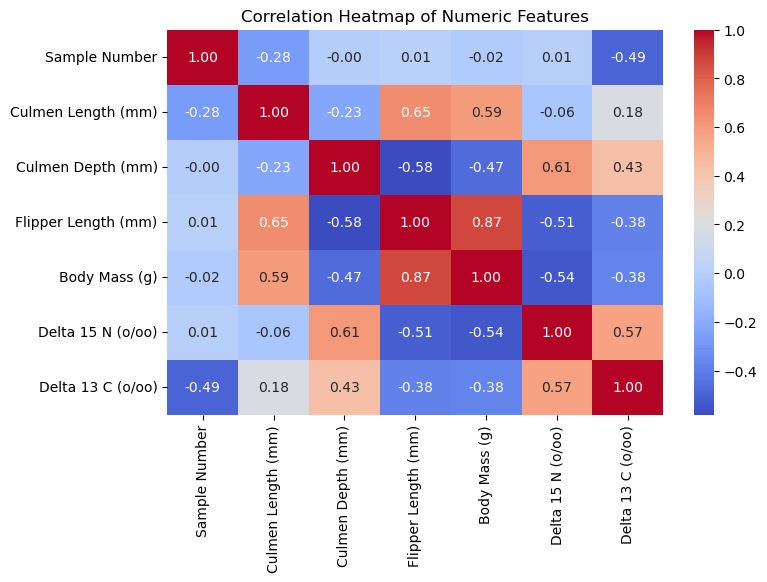

In [266]:
plt.figure(figsize=(8,5))
sns.heatmap(numeric_cols.corr(), cmap = 'coolwarm', fmt = '.2f', annot = True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()